## Software Design 2017年12月号「ITエンジニアと数学-数学プログラミング入門」
http://gihyo.jp/magazine/SD/archive/2017/201712

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0,99,100)

In [5]:
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99.])

In [6]:
f_noisy = np.vectorize(lambda x: x * 10 + np.random.normal(0,100))

In [8]:
# 実データ
d = f_noisy(x)

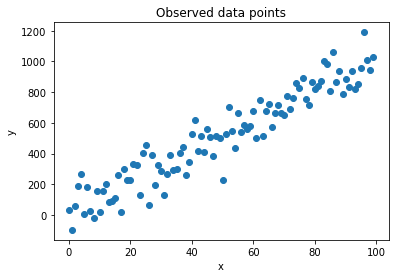

In [16]:
plt.scatter(x, d)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Observed data points')

$$
\begin{eqnarray}
f(x_n; w) = x_n \times w\\
E(w) = \frac{1}{2} \times \sum_{n=1}^{N} (d_n - f(x_n; w))^2\\
\end{eqnarray}
$$

wの最適解を最急降下法で求める
今回は簡単のためパラメータは一つにする。

In [12]:
f = np.vectorize(lambda x, w: x*w)
E = np.vectorize(lambda w: 1/2 *sum([(i - j) ** 2 for i, j in zip(d, f(x, w))]))

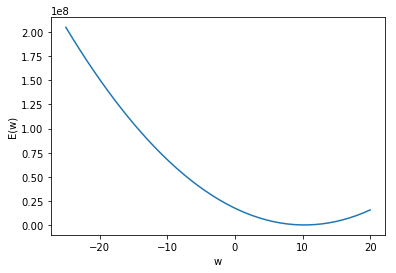

In [34]:
ws = np.linspace(-25,20,45)

plt.plot(ws, E(ws))
plt.ylabel('E(w)')
plt.xlabel('w')

## 更新式
$$
\begin{eqnarray}
w^{(t+1)} = w^{(t)} - \epsilon \frac{dE(w)}{dw} \\
\end{eqnarray}
$$

## 勾配
$$
\begin{eqnarray}
\nabla E(w) = \frac{dE(w)}{dw} = \sum_{n=1}^{N} x^2_n w - \sum_{n-1}^{n} d_n x_n \\
\end{eqnarray}
$$

In [27]:
def gradient_descent(eps, error=1e-8, iter_max=1000):
    '''
    eps: 学習係数
    error: 収束条件
    iter_max: 繰り返し最大回数
    '''
    
    # wの初期値を決める
    w = np.random.randint(-20, 20)
    w_history = [w]
    
    for _ in range(iter_max):
        # wの値を更新。
        w_next = w - eps * (sum(x * x * w) - sum(d*x))
        if abs(w_next - w) < error:
            break
        w = w_next
        w_history.append(w)

    return w, w_history

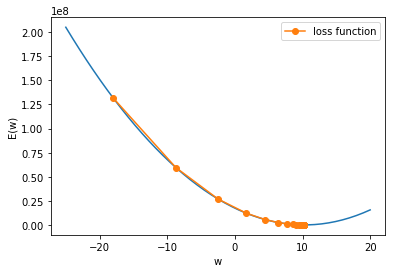

In [37]:
w, w_history = gradient_descent(1e-06)

plt.plot(ws, E(ws), '-')
plt.plot(w_history, E(w_history), 'o-', label='loss function')

plt.legend()
plt.xlabel('w')
plt.ylabel('E(w)')

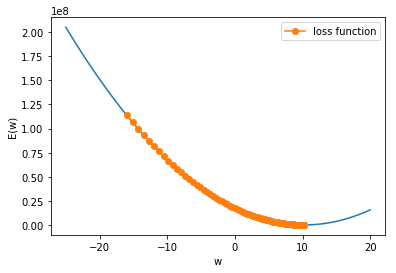

In [39]:
w, w_history = gradient_descent(1e-07)

plt.plot(ws, E(ws), '-')
plt.plot(w_history, E(w_history), 'o-', label='loss function')

plt.legend()
plt.xlabel('w')
plt.ylabel('E(w)')

/Users/yasumizuyoshiaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in double_scalars
/Users/yasumizuyoshiaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in multiply
/Users/yasumizuyoshiaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/yasumizuyoshiaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/yasumizuyoshiaki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/lib/function_base.py:2652: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


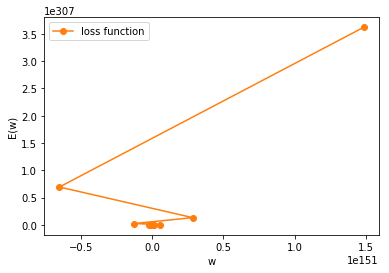

In [38]:
w, w_history = gradient_descent(1e-05)

plt.plot(ws, E(ws), '-')
plt.plot(w_history, E(w_history), 'o-', label='loss function')

plt.legend()
plt.xlabel('w')
plt.ylabel('E(w)')